# Global Power Plant Database Project

In [83]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from collections import Counter
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# check for the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [4]:
# checking for null values
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [5]:
# checking for null values
df.isnull().mean()

country                     0.000000
country_long                0.000000
name                        0.000000
gppd_idnr                   0.000000
capacity_mw                 0.000000
latitude                    0.050717
longitude                   0.050717
primary_fuel                0.000000
other_fuel1                 0.781698
other_fuel2                 0.998897
other_fuel3                 1.000000
commissioning_year          0.418964
owner                       0.622933
source                      0.000000
url                         0.000000
geolocation_source          0.020948
wepp_id                     1.000000
year_of_capacity_data       0.427784
generation_gwh_2013         1.000000
generation_gwh_2014         0.561191
generation_gwh_2015         0.534730
generation_gwh_2016         0.521499
generation_gwh_2017         0.514884
generation_gwh_2018         0.506064
generation_gwh_2019         1.000000
generation_data_source      0.504961
estimated_generation_gwh    1.000000
d

In [6]:
# deleting columns as all are having null values
df=df.drop(['other_fuel2', 'other_fuel3', 'wepp_id', 'generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'], axis=1)

In [7]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_data_source'],
      dtype='object')

In [8]:
df.isnull().mean()

country                   0.000000
country_long              0.000000
name                      0.000000
gppd_idnr                 0.000000
capacity_mw               0.000000
latitude                  0.050717
longitude                 0.050717
primary_fuel              0.000000
other_fuel1               0.781698
commissioning_year        0.418964
owner                     0.622933
source                    0.000000
url                       0.000000
geolocation_source        0.020948
year_of_capacity_data     0.427784
generation_gwh_2014       0.561191
generation_gwh_2015       0.534730
generation_gwh_2016       0.521499
generation_gwh_2017       0.514884
generation_gwh_2018       0.506064
generation_data_source    0.504961
dtype: float64

In [9]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#filling null values for numerical data
for column in['latitude', 'longitude','commissioning_year', 'year_of_capacity_data','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']:
    df[column]=df[column].fillna(df[column].mean())
    


In [11]:
# checking for null values
df.isnull().mean()

country                   0.000000
country_long              0.000000
name                      0.000000
gppd_idnr                 0.000000
capacity_mw               0.000000
latitude                  0.000000
longitude                 0.000000
primary_fuel              0.000000
other_fuel1               0.781698
commissioning_year        0.000000
owner                     0.622933
source                    0.000000
url                       0.000000
geolocation_source        0.020948
year_of_capacity_data     0.000000
generation_gwh_2014       0.000000
generation_gwh_2015       0.000000
generation_gwh_2016       0.000000
generation_gwh_2017       0.000000
generation_gwh_2018       0.000000
generation_data_source    0.504961
dtype: float64

In [12]:
#filling null values for categorical data
df1=df.fillna(method='pad')


In [13]:
df1.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               4
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    3
dtype: int64

In [14]:
df1.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.000000,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,1997.091082,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,1997.091082,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.000000,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.000000,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [15]:
# dropping nan values columns
df2=df1.dropna(how='any')
df2

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.000000,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.55000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
5,IND,India,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,Oil,2005.000000,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,1153.42100,1208.852000,1175.765000,1147.913000,976.655000,Central Electricity Authority
6,IND,India,ALIYAR,IND0000004,60.0,10.4547,77.0078,Hydro,Oil,1970.000000,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,157.55825,152.195200,61.421350,89.629600,48.327150,Central Electricity Authority
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.0,32.2258,77.2070,Hydro,Oil,2010.000000,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,674.39110,721.335200,675.724400,679.594950,579.318850,Central Electricity Authority
8,IND,India,ALMATTI DAM,IND0000006,290.0,16.3300,75.8863,Hydro,Oil,2004.000000,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,480.59495,144.434200,402.029750,439.372100,406.377900,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.000000,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,2431.82359,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,Oil,1997.091082,...,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,Oil,1997.091082,...,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,Oil,1997.091082,...,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority


In [16]:
# checking for null values
df2.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

In [17]:
df2.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,903.000000,903.000000,903.000000,903.000000,903.0,903.000000,903.000000,903.000000,903.000000,903.000000
mean,327.364614,21.182488,77.466321,1997.068028,2019.0,2433.832488,2429.981630,2469.688722,2549.845666,2602.990771
std,591.132701,6.086296,4.790133,13.034916,0.0,2670.558194,2865.195926,2883.782549,2927.300066,3036.808411
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.056950,74.398050,1997.091082,2019.0,1211.362750,916.000000,889.477150,882.594850,824.842340
50%,59.200000,21.247800,77.007800,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,388.250000,25.176450,79.206100,2003.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [18]:
df2.duplicated()

4      False
5      False
6      False
7      False
8      False
       ...  
902    False
903    False
904    False
905    False
906    False
Length: 903, dtype: bool

In [19]:
# Checking for duplicate values
df2.duplicated().sum()

0

In [20]:
# finding unique values
for column in df2.columns:
    print(df2[column].nunique())

1
1
903
903
358
833
824
8
3
74
279
191
302
3
1
371
396
403
408
410
1


In [21]:
# to check the object type/categorical data
for column in df2.columns:
    if df2[column].dtype==object:
        print("{}:{}".format(column,df2[column].unique()))

country:['IND']
country_long:['India']
name:['AKALTARA TPP' 'AKRIMOTA LIG' 'ALIYAR' 'ALLAIN DUHANGAN' 'ALMATTI DAM'
 'AMAR KANTAK' 'AMARAVATI TPP' 'ANANDPUR SAHIB ST-I&II' 'ANAPARA "C"'
 'ANDHRA' 'ANOOPGARH ST I&II' 'ANPARA' 'ANTA GT' 'ANUPPUR' 'ANUPUR TPP'
 'ARVINDNAGAR SUGAR' 'ASHOKNAGAR MILL' 'ATHANI SUGAR' 'AURAIYA GT'
 'AVANTHA BHANDAR TPP' 'AWARPUR CEMENT PLANT' 'Abhijeet'
 'Amarsar Solar Power Plant' 'Anabura Wind Farm'
 'Ananthapur - Meil Solar Power Plant' 'Andrha Lake Wind Farm'
 'Anikkadavu Wind Farm' 'Arasinagundi Wind Farm'
 'Askandra - DREPL Solar Power Plant'
 'Askandra - Electromech Maritech Solar Power Plant'
 'Askandra - Finehope Solar Power Plant'
 'Askandra - Khaya Solar Power Plant'
 'Askandra - Newton Solar Power Plant'
 'Askandra - Saidham Solar Power Plant'
 'Askandra - Vasavi Solar Power Plant' 'BADARPUR' 'BAGALKOT ICP'
 'BAGLIHAR HEP' 'BAGLIHAR HEP-II' 'BAIRA SIUL' 'BAKRESWAR' 'BALCO TPP'
 'BALIMELA' 'BALLARPUR BILT POWER' 'BAMANIA CEMENT' 'BANDAKHAR TPP'
 'BA

In [22]:
df2.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_data_source'],
      dtype='object')

In [23]:
# to check if the data is balance or not
df2['primary_fuel'].value_counts()

Coal       257
Hydro      251
Solar      126
Wind       122
Gas         68
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

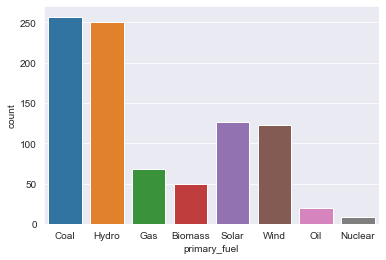

In [24]:
# visualizing the data primary_fuel
sns.countplot(x=df2['primary_fuel'])

In [25]:
# checking the numerical and categorical columns
numeric_col=list(df2.select_dtypes(include=np.number).columns)

categorical_col=list(df2.select_dtypes(include=object).columns)

In [26]:
numeric_col

['capacity_mw',
 'latitude',
 'longitude',
 'commissioning_year',
 'year_of_capacity_data',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018']

In [27]:
categorical_col

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'primary_fuel',
 'other_fuel1',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'generation_data_source']

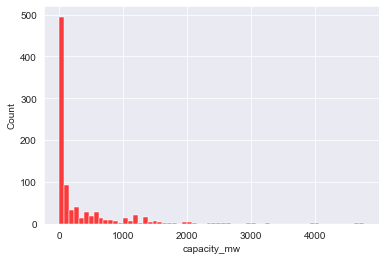

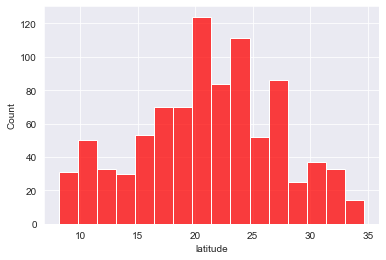

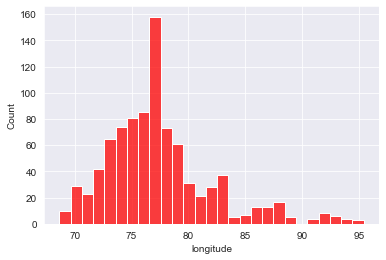

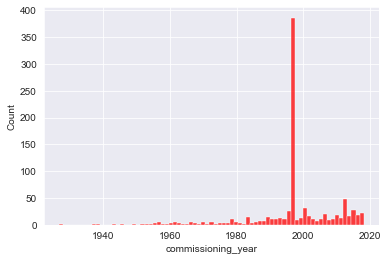

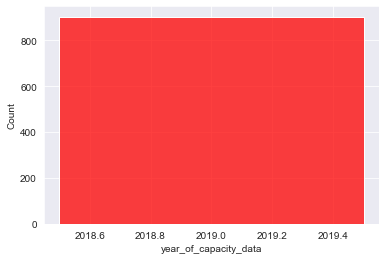

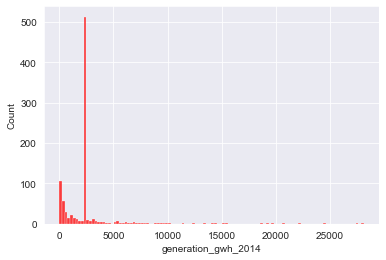

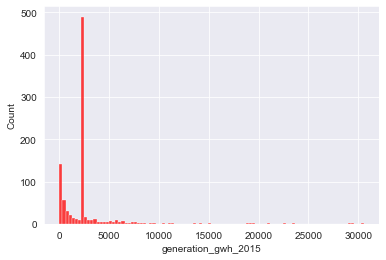

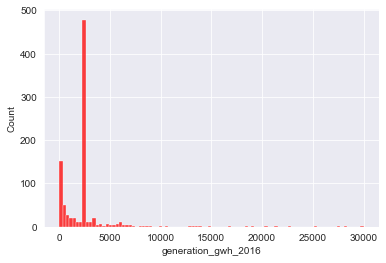

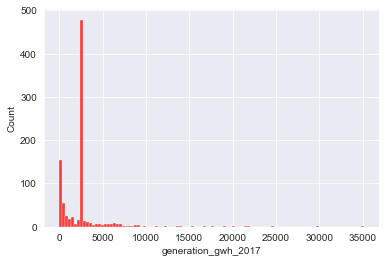

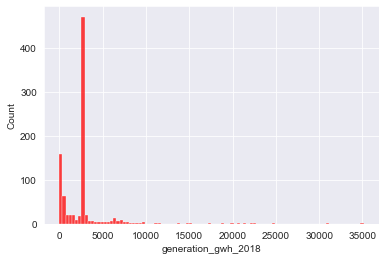

In [28]:
# visualizing numeric data
for col in numeric_col:
    sns.histplot(x=df2[col], palette='PuBu', color='red')
    plt.show()

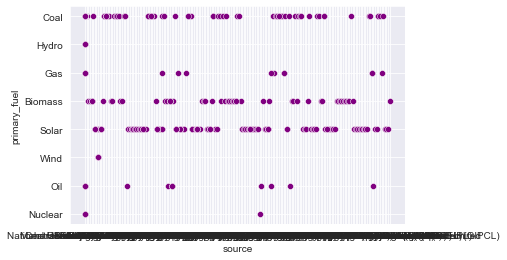

None


In [29]:
# using scatterplot to check relation between source and primary_fuel
sns.scatterplot(data=df2, x='source', y='primary_fuel', color='purple')
print(plt.show())

In [30]:
# Primary_fuel based on source
df2.groupby('source')['primary_fuel'].value_counts()

source                                                       primary_fuel
ACME Cleantech Solutions Private Limited                     Solar           1
ACME Solar Energy                                            Solar           1
AES Winfra                                                   Solar           1
Acc Acc ltd                                                  Coal            4
Adani Power Limite r Er                                      Solar           2
                                                                            ..
Welspun Solar Punjab Private Limited                         Solar           2
West Bengal Energy Development Corporation Limited (WBEDCL)  Solar           1
West Coast Paper Mills Ltd.                                  Gas             1
Yashwantrao Krishna ssk                                      Biomass         1
Ym Ssk ltd                                                   Biomass         1
Name: primary_fuel, Length: 199, dtype: int64

In [31]:
#primary_fuel based on capacity_mw
df2.groupby('capacity_mw')['primary_fuel'].value_counts()

capacity_mw  primary_fuel
0.0          Solar            1
1.0          Solar           17
             Wind             1
1.5          Wind             3
1.7          Wind             2
                             ..
3300.0       Coal             1
3960.0       Coal             1
4000.0       Coal             1
4620.0       Coal             1
4760.0       Coal             1
Name: primary_fuel, Length: 484, dtype: int64

In [32]:
#primary_fuel based on name
df2.groupby('name')['primary_fuel'].value_counts()

name                          primary_fuel
AKALTARA TPP                  Coal            1
AKRIMOTA LIG                  Coal            1
ALIYAR                        Hydro           1
ALLAIN DUHANGAN               Hydro           1
ALMATTI DAM                   Hydro           1
                                             ..
YERMARUS TPP                  Coal            1
Yelesandra Solar Power Plant  Solar           1
Yelisirur wind power project  Wind            1
ZAWAR MINES                   Coal            1
iEnergy Theni Wind Farm       Wind            1
Name: primary_fuel, Length: 903, dtype: int64

In [33]:
# Data Preprocessing for classification problem
X=df2.drop(['primary_fuel'], axis=1)
y=df2['primary_fuel']

In [34]:
X

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Oil,2015.000000,AES,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.55000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
5,IND,India,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Oil,2005.000000,AES,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,1153.42100,1208.852000,1175.765000,1147.913000,976.655000,Central Electricity Authority
6,IND,India,ALIYAR,IND0000004,60.0,10.4547,77.0078,Oil,1970.000000,AES,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,157.55825,152.195200,61.421350,89.629600,48.327150,Central Electricity Authority
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.0,32.2258,77.2070,Oil,2010.000000,AES,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,674.39110,721.335200,675.724400,679.594950,579.318850,Central Electricity Authority
8,IND,India,ALMATTI DAM,IND0000006,290.0,16.3300,75.8863,Oil,2004.000000,AES,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,480.59495,144.434200,402.029750,439.372100,406.377900,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Oil,2016.000000,Yashwantrao Krishna ssk,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,2431.82359,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Oil,1997.091082,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Oil,1997.091082,Karnataka Power Corporation Limited,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Oil,1997.091082,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority


In [35]:
y

4       Coal
5       Coal
6      Hydro
7      Hydro
8      Hydro
       ...  
902     Coal
903    Solar
904     Wind
905     Coal
906     Wind
Name: primary_fuel, Length: 903, dtype: object

In [36]:
# converting categorical data into numerical data using Label Encoder
label_encoder=LabelEncoder()
y=label_encoder.fit_transform(y)
y

array([1, 1, 3, 3, 3, 1, 1, 3, 1, 3, 3, 1, 2, 1, 1, 0, 0, 0, 2, 1, 1, 6,
       6, 7, 6, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 1, 0, 3, 3, 3, 1, 1, 3, 1,
       1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 2, 1, 3, 1, 1, 1, 2, 3, 3, 7, 7, 1,
       0, 0, 5, 1, 1, 1, 3, 1, 3, 1, 0, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3,
       3, 1, 0, 1, 1, 1, 1, 3, 3, 1, 1, 1, 7, 5, 2, 1, 3, 5, 1, 6, 6, 7,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 6, 7, 6, 6, 6, 6, 1, 3, 3,
       3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 0, 6, 6, 7, 6, 1,
       1, 2, 4, 1, 1, 1, 0, 0, 3, 1, 2, 3, 3, 1, 1, 3, 2, 2, 5, 3, 3, 2,
       0, 5, 3, 3, 3, 0, 3, 1, 1, 1, 6, 2, 7, 6, 7, 6, 6, 6, 6, 6, 6, 3,
       3, 7, 2, 7, 7, 7, 7, 1, 2, 7, 2, 7, 1, 2, 3, 2, 2, 3, 1, 3, 3, 2,
       1, 7, 3, 3, 3, 1, 1, 3, 7, 1, 2, 1, 1, 2, 1, 3, 7, 6, 6, 6, 6, 6,
       6, 6, 7, 6, 6, 6, 6, 1, 3, 0, 3, 0, 2, 2, 0, 3, 0, 7, 7, 7, 7, 7,
       1, 7, 6, 1, 2, 3, 3, 1, 7, 1, 1, 3, 1, 1, 7, 6, 6, 3, 0, 3, 1, 1,
       1, 1, 1, 2, 3, 1, 3, 1, 6, 6, 7, 7, 7, 7, 7,

In [37]:
# converting categorical data into numerical data using get_dummies
X=pd.get_dummies(X,drop_first=True)
X

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,...,url_https://www.google.com/maps/d/embed?mid=1bXiXRcLRnBCUfpkHM2J5EVryhG4&ll=31.06035315253383%2C35.02284616406246&z=8,url_https://www.iaea.org/PRIS/CountryStatistics/ReactorDetails.aspx?current=853,url_https://www.iocl.com,url_https://www.jaibalajigroup.com/power.html,url_https://www.kesocorp.com/,url_https://www.solairedirect.com,url_https://www.vardhman.com/,url_https://www.zaubacorp.com/company/MAHATMA-SUGAR-POWER-LIMITED/U15421MH1997PLC111855,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
4,1800.0,21.9603,82.4091,2015.000000,2019.0,3035.55000,5916.370000,6243.000000,5385.579736,7279.000000,...,0,0,0,0,0,0,0,0,0,1
5,250.0,23.7689,68.6447,2005.000000,2019.0,1153.42100,1208.852000,1175.765000,1147.913000,976.655000,...,0,0,0,0,0,0,0,0,0,1
6,60.0,10.4547,77.0078,1970.000000,2019.0,157.55825,152.195200,61.421350,89.629600,48.327150,...,0,0,0,0,0,0,0,0,0,1
7,192.0,32.2258,77.2070,2010.000000,2019.0,674.39110,721.335200,675.724400,679.594950,579.318850,...,0,0,0,0,0,0,0,0,0,1
8,290.0,16.3300,75.8863,2004.000000,2019.0,480.59495,144.434200,402.029750,439.372100,406.377900,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,2016.000000,2019.0,2431.82359,0.994875,233.596650,865.400000,686.500000,...,0,0,0,0,0,0,0,0,0,1
903,3.0,12.8932,78.1654,1997.091082,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,...,0,0,0,0,0,0,0,0,0,0
904,25.5,15.2758,75.5811,1997.091082,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,...,0,0,0,0,0,0,0,0,0,1
905,80.0,24.3500,73.7477,1997.091082,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,...,0,0,0,0,0,0,0,0,0,1


In [38]:
# training and testing the data
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=1, test_size=0.3)

In [39]:
#using scaler technique to fine tune features transformation technique
scaler=StandardScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test=pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)

In [40]:
X_train.head()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,...,url_https://www.google.com/maps/d/embed?mid=1bXiXRcLRnBCUfpkHM2J5EVryhG4&ll=31.06035315253383%2C35.02284616406246&z=8,url_https://www.iaea.org/PRIS/CountryStatistics/ReactorDetails.aspx?current=853,url_https://www.iocl.com,url_https://www.jaibalajigroup.com/power.html,url_https://www.kesocorp.com/,url_https://www.solairedirect.com,url_https://www.vardhman.com/,url_https://www.zaubacorp.com/company/MAHATMA-SUGAR-POWER-LIMITED/U15421MH1997PLC111855,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,-0.369178,-2.097934,-0.038326,-2.112223,0.0,-0.812282,-0.721966,-0.764230,-0.785234,-0.759480,...,0.0,-0.039809,0.0,-0.039809,-0.039809,-0.039809,-0.056344,0.0,0.0,0.404851
1,0.159741,0.418121,1.726366,-0.156133,0.0,-0.132402,-0.043284,-0.417587,-0.285121,-0.354161,...,0.0,-0.039809,0.0,-0.039809,-0.039809,-0.039809,-0.056344,0.0,0.0,0.404851
2,-0.170833,-0.684452,0.952037,0.391573,0.0,-0.826651,-0.814138,-0.819876,-0.825117,-0.820589,...,0.0,-0.039809,0.0,-0.039809,-0.039809,-0.039809,-0.056344,0.0,0.0,0.404851
3,-0.526201,0.765601,-0.584488,0.007481,0.0,-0.013615,-0.006693,-0.005258,-0.001420,0.002424,...,0.0,-0.039809,0.0,-0.039809,-0.039809,-0.039809,-0.056344,0.0,0.0,-2.470045
4,-0.259262,-1.362521,-0.544818,0.007481,0.0,-0.013615,-0.006693,-0.005258,-0.001420,0.002424,...,0.0,-0.039809,0.0,-0.039809,-0.039809,-0.039809,-0.056344,0.0,0.0,0.404851


In [41]:
X_test.head()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,...,url_https://www.google.com/maps/d/embed?mid=1bXiXRcLRnBCUfpkHM2J5EVryhG4&ll=31.06035315253383%2C35.02284616406246&z=8,url_https://www.iaea.org/PRIS/CountryStatistics/ReactorDetails.aspx?current=853,url_https://www.iocl.com,url_https://www.jaibalajigroup.com/power.html,url_https://www.kesocorp.com/,url_https://www.solairedirect.com,url_https://www.vardhman.com/,url_https://www.zaubacorp.com/company/MAHATMA-SUGAR-POWER-LIMITED/U15421MH1997PLC111855,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,1.944841,-1.320381,0.576522,1.252252,0.0,1.026596,1.556930,2.007058,1.310380,1.429786,...,0.0,-0.039809,0.0,-0.039809,-0.039809,-0.039809,-0.056344,0.0,0.0,0.404851
1,-0.526201,0.032518,-0.899007,0.007481,0.0,-0.013615,-0.006693,-0.005258,-0.001420,0.002424,...,0.0,-0.039809,0.0,-0.039809,-0.039809,-0.039809,-0.056344,0.0,0.0,-2.470045
2,-0.519589,-0.513298,-0.699631,-1.721005,0.0,-0.013615,-0.006693,-0.005258,-0.001420,0.002424,...,0.0,-0.039809,0.0,-0.039809,-0.039809,-0.039809,-0.056344,0.0,0.0,0.404851
3,2.738220,1.437192,-0.465109,1.408739,0.0,-0.374530,0.133886,1.364832,1.734049,2.299403,...,0.0,-0.039809,0.0,-0.039809,-0.039809,-0.039809,-0.056344,0.0,0.0,0.404851
4,-0.468350,0.790917,2.945924,1.565227,0.0,-0.013615,-0.006693,-0.005258,-0.773802,-0.763904,...,0.0,-0.039809,0.0,-0.039809,-0.039809,-0.039809,-0.056344,0.0,0.0,0.404851


In [42]:
# model building using Logistic Regression
lr=LogisticRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
print("Accuracy on training data:{:,.3f}".format(lr.score(X_train,y_train)))
print("Accuracy on test data:{:,.3f}".format(lr.score(X_test,y_test)))

Accuracy on training data:1.000
Accuracy on test data:0.720


In [43]:
y_pred

array([1, 6, 3, 1, 1, 1, 3, 6, 3, 3, 0, 3, 1, 6, 7, 1, 3, 7, 2, 0, 3, 1,
       1, 3, 1, 7, 6, 1, 3, 3, 3, 3, 6, 3, 3, 3, 1, 7, 3, 1, 3, 3, 1, 1,
       3, 6, 7, 7, 1, 3, 1, 3, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 7, 3, 6,
       1, 7, 3, 3, 3, 1, 1, 3, 3, 1, 6, 6, 1, 6, 7, 3, 3, 3, 1, 3, 3, 1,
       1, 1, 7, 1, 1, 3, 3, 3, 3, 6, 7, 1, 7, 1, 1, 3, 1, 1, 7, 1, 1, 7,
       6, 3, 3, 3, 1, 3, 1, 3, 3, 1, 3, 1, 3, 7, 3, 1, 3, 1, 6, 3, 3, 1,
       3, 1, 7, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 6, 7, 3, 3, 1, 1,
       3, 6, 3, 6, 6, 3, 3, 7, 6, 6, 3, 7, 1, 1, 1, 3, 6, 3, 1, 6, 3, 3,
       7, 1, 7, 1, 7, 3, 1, 1, 3, 7, 3, 7, 3, 6, 3, 1, 1, 3, 3, 3, 7, 3,
       7, 3, 3, 7, 3, 6, 3, 6, 1, 1, 1, 3, 1, 1, 1, 7, 1, 6, 3, 3, 3, 1,
       1, 1, 3, 7, 1, 2, 3, 7, 3, 1, 3, 6, 7, 1, 3, 3, 6, 1, 1, 3, 3, 3,
       3, 3, 6, 3, 3, 7, 6, 3, 6, 6, 3, 7, 6, 7, 1, 1, 1, 1, 1, 3, 3, 7,
       6, 6, 3, 1, 1, 3, 3])

In [44]:
# checking accuracy score on test data and classification report
print(metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7195571955719557
              precision    recall  f1-score   support

           0       1.00      0.12      0.22        16
           1       0.67      0.71      0.69        82
           2       0.50      0.06      0.10        18
           3       0.61      0.93      0.74        73
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         7
           6       0.97      0.89      0.93        37
           7       0.94      0.89      0.92        37

    accuracy                           0.72       271
   macro avg       0.59      0.45      0.45       271
weighted avg       0.72      0.72      0.68       271



In [45]:
# model building using Support Vector Machine
from sklearn import svm
from sklearn.svm import SVC

In [46]:
sv=svm.SVC()
sv.fit(X_train, y_train)
y_pred=sv.predict(X_test)
print("Accuracy on training data:{:,.3f}".format(sv.score(X_train,y_train)))
print("Accuracy on test data:{:,.3f}".format(sv.score(X_test,y_test)))

Accuracy on training data:0.946
Accuracy on test data:0.277


In [47]:
# checking accuracy score on test data and classification report
print(metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.2767527675276753
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.67      0.02      0.05        82
           2       0.00      0.00      0.00        18
           3       0.27      1.00      0.43        73
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00        37
           7       0.00      0.00      0.00        37

    accuracy                           0.28       271
   macro avg       0.12      0.13      0.06       271
weighted avg       0.28      0.28      0.13       271



In [75]:
# model building using Random Forest Classifier
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred=rfc.predict(X_test)
print("Accuracy on training data:{:,.3f}".format(rfc.score(X_train,y_train)))
print("Accuracy on test data:{:,.3f}".format(rfc.score(X_test,y_test)))

Accuracy on training data:1.000
Accuracy on test data:0.823


In [76]:
# checking accuracy score on test data and classification report
print(metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8228782287822878
              precision    recall  f1-score   support

           0       0.61      0.69      0.65        16
           1       0.80      0.82      0.81        82
           2       0.14      0.06      0.08        18
           3       0.79      0.95      0.86        73
           4       0.00      0.00      0.00         1
           5       1.00      0.14      0.25         7
           6       1.00      1.00      1.00        37
           7       1.00      1.00      1.00        37

    accuracy                           0.82       271
   macro avg       0.67      0.58      0.58       271
weighted avg       0.80      0.82      0.80       271



In [77]:
# model building using decisiontree classifier
dtc=DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)
dtc.fit(X_train, y_train)
y_pred=dtc.predict(X_test)
print("Accuracy on training data:{:,.3f}".format(dtc.score(X_train,y_train)))
print("Accuracy on test data:{:,.3f}".format(dtc.score(X_test,y_test)))

Accuracy on training data:0.823
Accuracy on test data:0.797


In [80]:
metrics.confusion_matrix(y_test, y_pred)

array([[14,  2,  0,  0,  0,  0,  0,  0],
       [ 7, 58,  1, 16,  0,  0,  0,  0],
       [ 2,  5,  2,  9,  0,  0,  0,  0],
       [ 0,  2,  1, 70,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0],
       [ 3,  1,  2,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  0,  1, 36]], dtype=int64)

In [81]:
# checking accuracy score on test data and classification report
print(metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7970479704797048
              precision    recall  f1-score   support

           0       0.54      0.88      0.67        16
           1       0.83      0.71      0.76        82
           2       0.33      0.11      0.17        18
           3       0.73      0.96      0.83        73
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         7
           6       0.97      0.97      0.97        37
           7       1.00      0.97      0.99        37

    accuracy                           0.80       271
   macro avg       0.55      0.57      0.55       271
weighted avg       0.77      0.80      0.77       271



In [79]:
'''Conclusion: Comparing four models Suport Vector Machine(SVM) and Logistic Regression, Random Forest Classifier and Decision Tree clasifier.
Accuracy score on test data for Logistic Regression:0.72, Accuracy score on test data for Support Vector Machine: 0.28
Accuracy score on test data for Random Forest Classifier: 0.83. Accuracy score on test data for Decision Tree Classifier: 797.So we can choose Random Forest Classifier for model building as it's accuracy score is more. '''

"Conclusion: Comparing four models Suport Vector Machine(SVM) and Logistic Regression, Random Forest Classifier and Decision Tree clasifier.\nAccuracy score on test data for Logistic Regression:0.72, Accuracy score on test data for Support Vector Machine: 0.28\nAccuracy score on test data for Random Forest Classifier: 0.83. Accuracy score on test data for Decision Tree Classifier: 797.So we can choose Random Forest Classifier for model building as it's accuracy score is more. "

In [52]:
df2

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.000000,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.55000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
5,IND,India,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,Oil,2005.000000,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,1153.42100,1208.852000,1175.765000,1147.913000,976.655000,Central Electricity Authority
6,IND,India,ALIYAR,IND0000004,60.0,10.4547,77.0078,Hydro,Oil,1970.000000,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,157.55825,152.195200,61.421350,89.629600,48.327150,Central Electricity Authority
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.0,32.2258,77.2070,Hydro,Oil,2010.000000,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,674.39110,721.335200,675.724400,679.594950,579.318850,Central Electricity Authority
8,IND,India,ALMATTI DAM,IND0000006,290.0,16.3300,75.8863,Hydro,Oil,2004.000000,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,480.59495,144.434200,402.029750,439.372100,406.377900,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.000000,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,2431.82359,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,Oil,1997.091082,...,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,Oil,1997.091082,...,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,Oil,1997.091082,...,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority


In [53]:
# Data Preprocessing for regression problem
X1=df2.drop(['capacity_mw'], axis=1)
y1=df2['capacity_mw']

In [54]:
X1

,country,country_long,name,gppd_idnr,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
4,IND,India,AKALTARA TPP,IND0000002,21.9603,82.4091,Coal,Oil,2015.000000,AES,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.55000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
5,IND,India,AKRIMOTA LIG,IND0000003,23.7689,68.6447,Coal,Oil,2005.000000,AES,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,1153.42100,1208.852000,1175.765000,1147.913000,976.655000,Central Electricity Authority
6,IND,India,ALIYAR,IND0000004,10.4547,77.0078,Hydro,Oil,1970.000000,AES,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,157.55825,152.195200,61.421350,89.629600,48.327150,Central Electricity Authority
7,IND,India,ALLAIN DUHANGAN,IND0000005,32.2258,77.2070,Hydro,Oil,2010.000000,AES,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,674.39110,721.335200,675.724400,679.594950,579.318850,Central Electricity Authority
8,IND,India,ALMATTI DAM,IND0000006,16.3300,75.8863,Hydro,Oil,2004.000000,AES,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,480.59495,144.434200,402.029750,439.372100,406.377900,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,16.2949,77.3568,Coal,Oil,2016.000000,Yashwantrao Krishna ssk,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,2431.82359,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,12.8932,78.1654,Solar,Oil,1997.091082,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
904,IND,India,Yelisirur wind power project,WRI1026776,15.2758,75.5811,Wind,Oil,1997.091082,Karnataka Power Corporation Limited,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
905,IND,India,ZAWAR MINES,WRI1019901,24.3500,73.7477,Coal,Oil,1997.091082,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority


In [55]:
y1

4      1800.0
5       250.0
6        60.0
7       192.0
8       290.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 903, dtype: float64

In [56]:
# converting categorical data into numerical data using get_dummies
X1=pd.get_dummies(X1,drop_first=True)
X1

,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,name_AKRIMOTA LIG,...,url_https://www.google.com/maps/d/embed?mid=1bXiXRcLRnBCUfpkHM2J5EVryhG4&ll=31.06035315253383%2C35.02284616406246&z=8,url_https://www.iaea.org/PRIS/CountryStatistics/ReactorDetails.aspx?current=853,url_https://www.iocl.com,url_https://www.jaibalajigroup.com/power.html,url_https://www.kesocorp.com/,url_https://www.solairedirect.com,url_https://www.vardhman.com/,url_https://www.zaubacorp.com/company/MAHATMA-SUGAR-POWER-LIMITED/U15421MH1997PLC111855,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
4,21.9603,82.4091,2015.000000,2019.0,3035.55000,5916.370000,6243.000000,5385.579736,7279.000000,0,...,0,0,0,0,0,0,0,0,0,1
5,23.7689,68.6447,2005.000000,2019.0,1153.42100,1208.852000,1175.765000,1147.913000,976.655000,1,...,0,0,0,0,0,0,0,0,0,1
6,10.4547,77.0078,1970.000000,2019.0,157.55825,152.195200,61.421350,89.629600,48.327150,0,...,0,0,0,0,0,0,0,0,0,1
7,32.2258,77.2070,2010.000000,2019.0,674.39110,721.335200,675.724400,679.594950,579.318850,0,...,0,0,0,0,0,0,0,0,0,1
8,16.3300,75.8863,2004.000000,2019.0,480.59495,144.434200,402.029750,439.372100,406.377900,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,16.2949,77.3568,2016.000000,2019.0,2431.82359,0.994875,233.596650,865.400000,686.500000,0,...,0,0,0,0,0,0,0,0,0,1
903,12.8932,78.1654,1997.091082,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,0,...,0,0,0,0,0,0,0,0,0,0
904,15.2758,75.5811,1997.091082,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,0,...,0,0,0,0,0,0,0,0,0,1
905,24.3500,73.7477,1997.091082,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,0,...,0,0,0,0,0,0,0,0,0,1


In [57]:
# training and testing the data
X1_train, X1_test, y_train, y_test=train_test_split(X1,y,random_state=1, test_size=0.3)

In [58]:
#using scaler technique to fine tune features transformation technique
scaler=StandardScaler()
X1_train=pd.DataFrame(scaler.fit_transform(X1_train),columns=X1_train.columns)
X1_test=pd.DataFrame(scaler.transform(X1_test),columns=X1_train.columns)

In [59]:
X1_train.head()

,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,name_AKRIMOTA LIG,...,url_https://www.google.com/maps/d/embed?mid=1bXiXRcLRnBCUfpkHM2J5EVryhG4&ll=31.06035315253383%2C35.02284616406246&z=8,url_https://www.iaea.org/PRIS/CountryStatistics/ReactorDetails.aspx?current=853,url_https://www.iocl.com,url_https://www.jaibalajigroup.com/power.html,url_https://www.kesocorp.com/,url_https://www.solairedirect.com,url_https://www.vardhman.com/,url_https://www.zaubacorp.com/company/MAHATMA-SUGAR-POWER-LIMITED/U15421MH1997PLC111855,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,-2.097934,-0.038326,-2.112223,0.0,-0.812282,-0.721966,-0.764230,-0.785234,-0.759480,-0.039809,...,0.0,-0.039809,0.0,-0.039809,-0.039809,-0.039809,-0.056344,0.0,0.0,0.404851
1,0.418121,1.726366,-0.156133,0.0,-0.132402,-0.043284,-0.417587,-0.285121,-0.354161,-0.039809,...,0.0,-0.039809,0.0,-0.039809,-0.039809,-0.039809,-0.056344,0.0,0.0,0.404851
2,-0.684452,0.952037,0.391573,0.0,-0.826651,-0.814138,-0.819876,-0.825117,-0.820589,-0.039809,...,0.0,-0.039809,0.0,-0.039809,-0.039809,-0.039809,-0.056344,0.0,0.0,0.404851
3,0.765601,-0.584488,0.007481,0.0,-0.013615,-0.006693,-0.005258,-0.001420,0.002424,-0.039809,...,0.0,-0.039809,0.0,-0.039809,-0.039809,-0.039809,-0.056344,0.0,0.0,-2.470045
4,-1.362521,-0.544818,0.007481,0.0,-0.013615,-0.006693,-0.005258,-0.001420,0.002424,-0.039809,...,0.0,-0.039809,0.0,-0.039809,-0.039809,-0.039809,-0.056344,0.0,0.0,0.404851


In [60]:
X1_test.head()

,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,name_AKRIMOTA LIG,...,url_https://www.google.com/maps/d/embed?mid=1bXiXRcLRnBCUfpkHM2J5EVryhG4&ll=31.06035315253383%2C35.02284616406246&z=8,url_https://www.iaea.org/PRIS/CountryStatistics/ReactorDetails.aspx?current=853,url_https://www.iocl.com,url_https://www.jaibalajigroup.com/power.html,url_https://www.kesocorp.com/,url_https://www.solairedirect.com,url_https://www.vardhman.com/,url_https://www.zaubacorp.com/company/MAHATMA-SUGAR-POWER-LIMITED/U15421MH1997PLC111855,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,-1.320381,0.576522,1.252252,0.0,1.026596,1.556930,2.007058,1.310380,1.429786,-0.039809,...,0.0,-0.039809,0.0,-0.039809,-0.039809,-0.039809,-0.056344,0.0,0.0,0.404851
1,0.032518,-0.899007,0.007481,0.0,-0.013615,-0.006693,-0.005258,-0.001420,0.002424,-0.039809,...,0.0,-0.039809,0.0,-0.039809,-0.039809,-0.039809,-0.056344,0.0,0.0,-2.470045
2,-0.513298,-0.699631,-1.721005,0.0,-0.013615,-0.006693,-0.005258,-0.001420,0.002424,-0.039809,...,0.0,-0.039809,0.0,-0.039809,-0.039809,-0.039809,-0.056344,0.0,0.0,0.404851
3,1.437192,-0.465109,1.408739,0.0,-0.374530,0.133886,1.364832,1.734049,2.299403,-0.039809,...,0.0,-0.039809,0.0,-0.039809,-0.039809,-0.039809,-0.056344,0.0,0.0,0.404851
4,0.790917,2.945924,1.565227,0.0,-0.013615,-0.006693,-0.005258,-0.773802,-0.763904,-0.039809,...,0.0,-0.039809,0.0,-0.039809,-0.039809,-0.039809,-0.056344,0.0,0.0,0.404851


In [61]:
# model building using Linear Regression
lr=LinearRegression()
lr.fit(X1_train, y_train)
y_pred=lr.predict(X1_test)
print("Accuracy on training data:{:,.3f}".format(lr.score(X1_train,y_train)))
print("Accuracy on test data:{:,.3f}".format(lr.score(X1_test,y_test)))

Accuracy on training data:1.000
Accuracy on test data:0.651


In [62]:
y_pred

array([1.76722459, 4.2238017 , 2.81276497, 1.98025776, 2.18986838,
       1.93645494, 2.97943739, 4.59122749, 2.55952404, 2.5242928 ,
       1.46358683, 3.10037229, 2.00580594, 5.30343275, 5.30215929,
       1.64162324, 3.00719982, 5.06290228, 3.28727006, 1.26638141,
       2.74725656, 1.33200122, 1.89478886, 1.97439268, 2.58907441,
       5.14166315, 4.18445564, 3.27713159, 3.38265544, 2.86291117,
       3.04494179, 3.07352191, 4.95179447, 2.95923402, 2.6118505 ,
       2.83499486, 3.30251208, 5.2801669 , 2.77741561, 4.06656391,
       2.75999339, 2.98608731, 2.33229328, 1.78905451, 2.89325184,
       5.52773706, 3.68987221, 5.19172317, 1.64105575, 2.13022422,
       1.88012569, 2.9993978 , 2.27005191, 2.75897483, 2.52662147,
       1.93327084, 1.80675058, 1.84866897, 1.79418081, 1.54907972,
       2.18622769, 3.34875737, 1.66682125, 5.40185386, 2.69658308,
       4.60285652, 1.66186574, 4.85164156, 2.45633105, 2.44071556,
       2.38545781, 4.04607329, 2.00478438, 3.07578181, 3.35435

In [63]:
# model building using Support Vector Machine
from sklearn import svm
from sklearn.svm import SVR

In [64]:
sv=svm.SVR()
sv.fit(X1_train, y_train)
y_pred=sv.predict(X1_test)
print("Accuracy on training data:{:,.3f}".format(sv.score(X1_train,y_train)))
print("Accuracy on test data:{:,.3f}".format(sv.score(X1_test,y_test)))

Accuracy on training data:0.631
Accuracy on test data:-2.817


In [65]:
# model building using Random Forest Regressor
rfc=RandomForestRegressor()

In [66]:
rfc.fit(X1_train, y_train)
y_pred=rfc.predict(X1_test)
print("Accuracy on training data:{:,.3f}".format(rfc.score(X1_train,y_train)))
print("Accuracy on test data:{:,.3f}".format(rfc.score(X1_test,y_test)))

Accuracy on training data:0.999
Accuracy on test data:0.999


In [67]:
'''Conclusion: Comparing three models Suport Vector Machine(SVM) and Linear Regression, Random Forest Regressor
Accuracy score on test data for Linear Regression:0.674, Accuracy score on test data for Support Vector Machine: 0.220
Accuracy score on test data for Random Forest Regressor: 0.85. So we can choose Random Forest Classifier for model building.'''

'Conclusion: Comparing three models Suport Vector Machine(SVM) and Linear Regression, Random Forest Regressor\nAccuracy score on test data for Linear Regression:0.674, Accuracy score on test data for Support Vector Machine: 0.220\nAccuracy score on test data for Random Forest Regressor: 0.85. So we can choose Random Forest Classifier for model building.'